<a href="https://colab.research.google.com/github/felipe24I/Entregas/blob/main/Parcial_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parcial 2 - Señales y Sistemas 2023 - 2**

## **Pregunta 2.1 :**

Encuentre la expresión del espectro de Fourier (forma exponencial y trigonométrica) para la señal $x(t)=|6\sin(3t  +\pi/4)|^2$, con $t\in [-\pi, \pi]$.  Presente las simulaciones respectivas para graficar el espectro y la reconstrucción de la señal en función del número de armónicos y el error relativo.

#**Solución teórica**

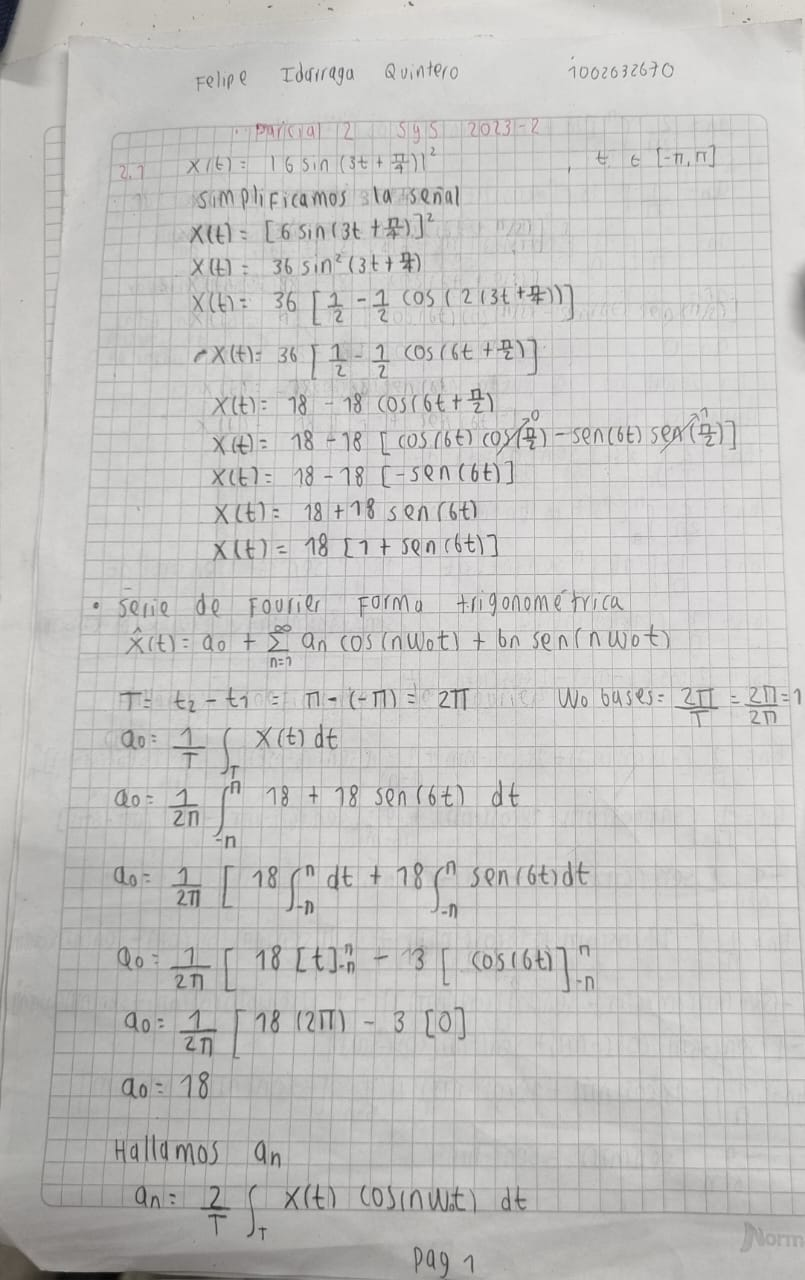

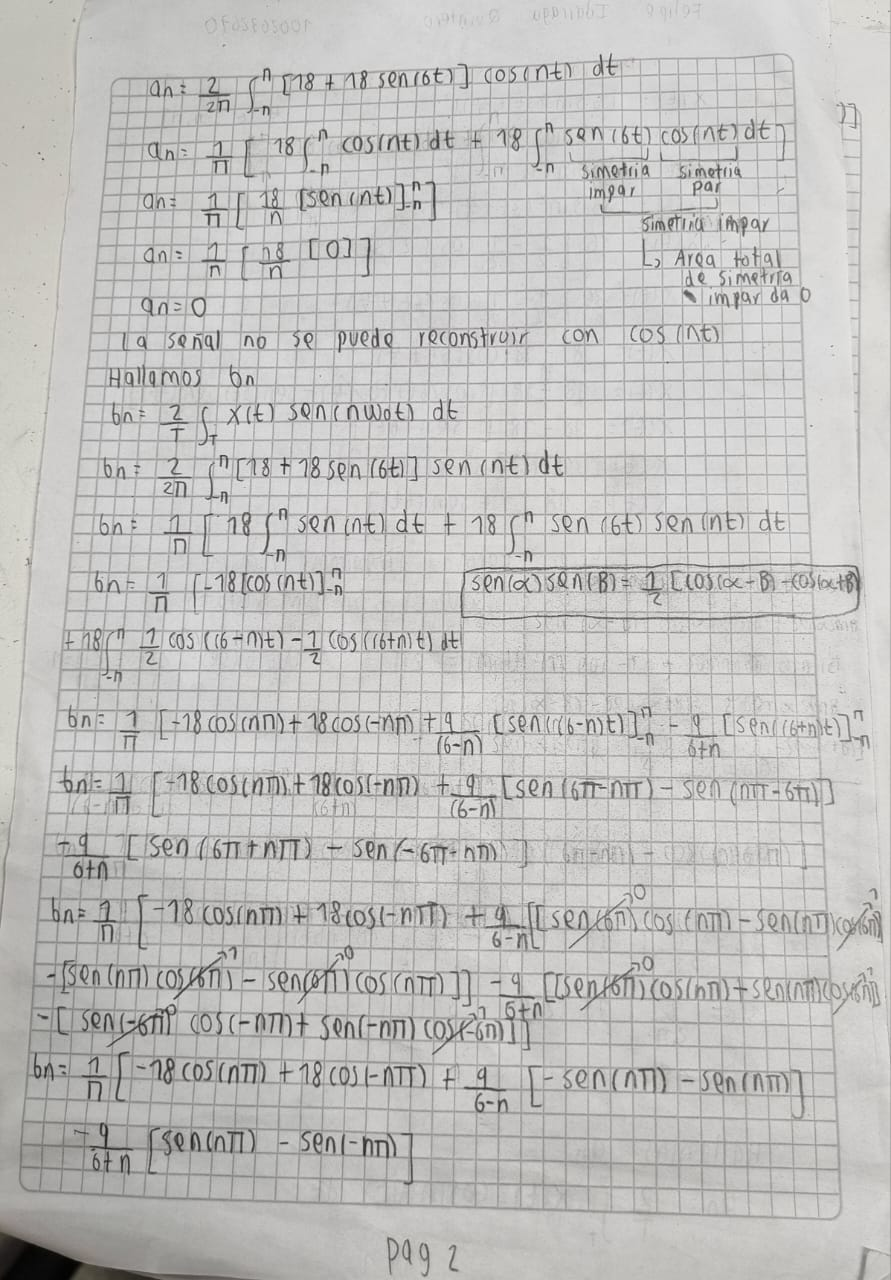

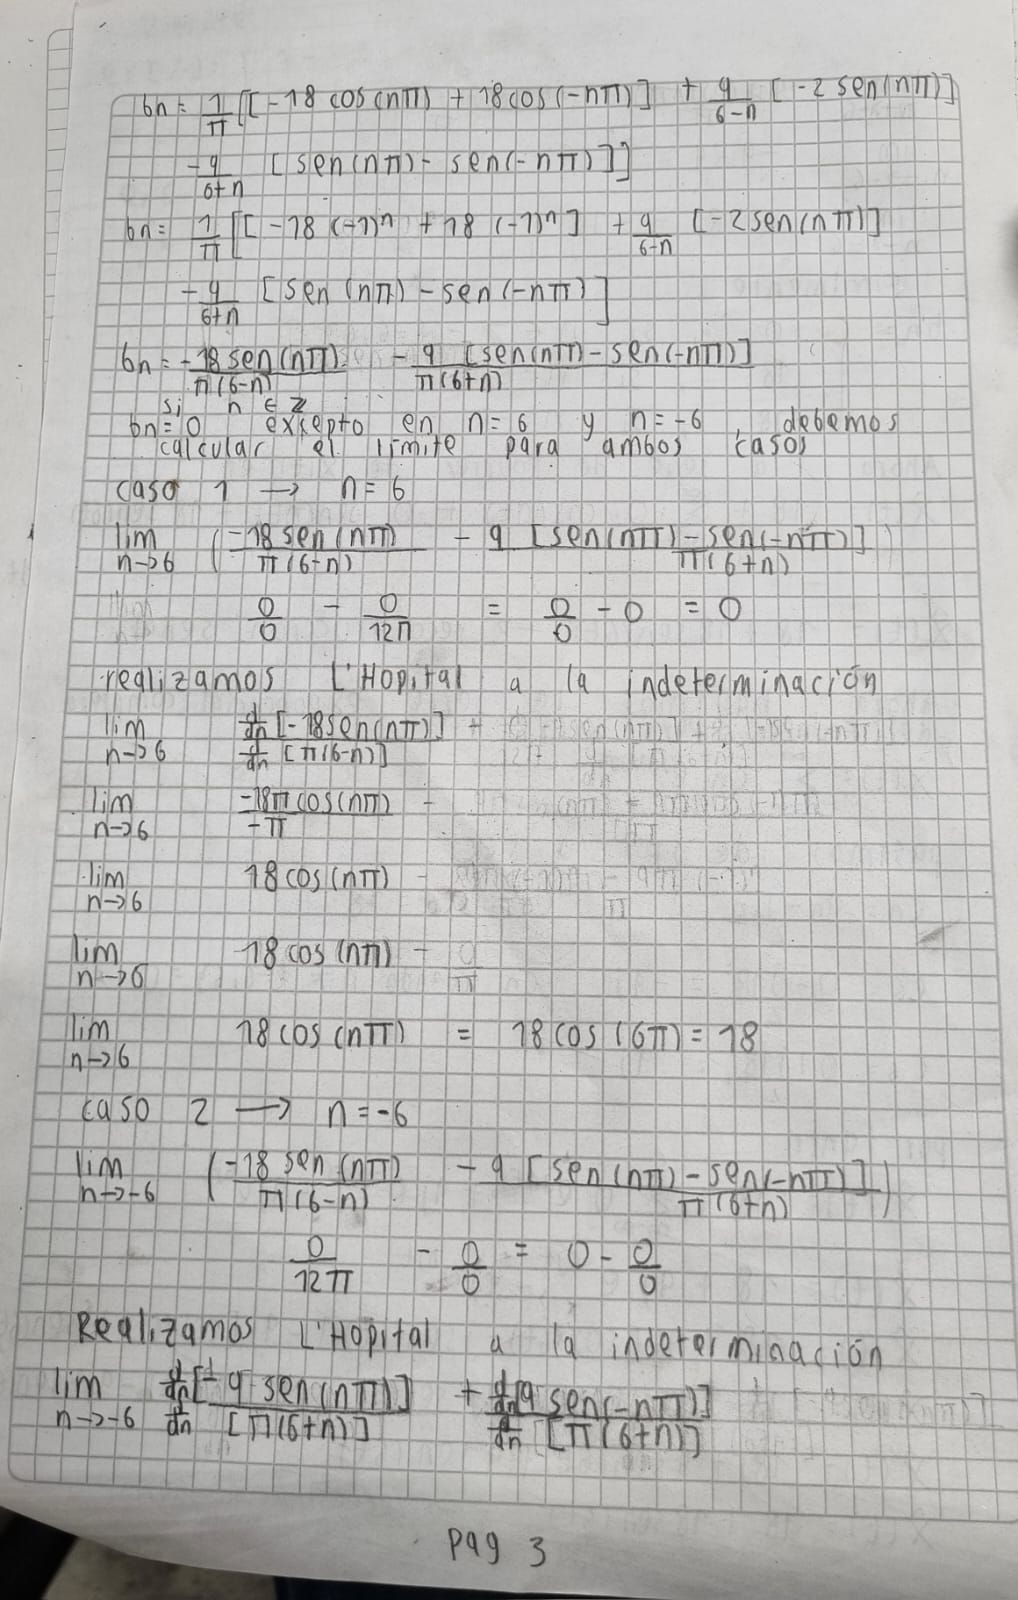

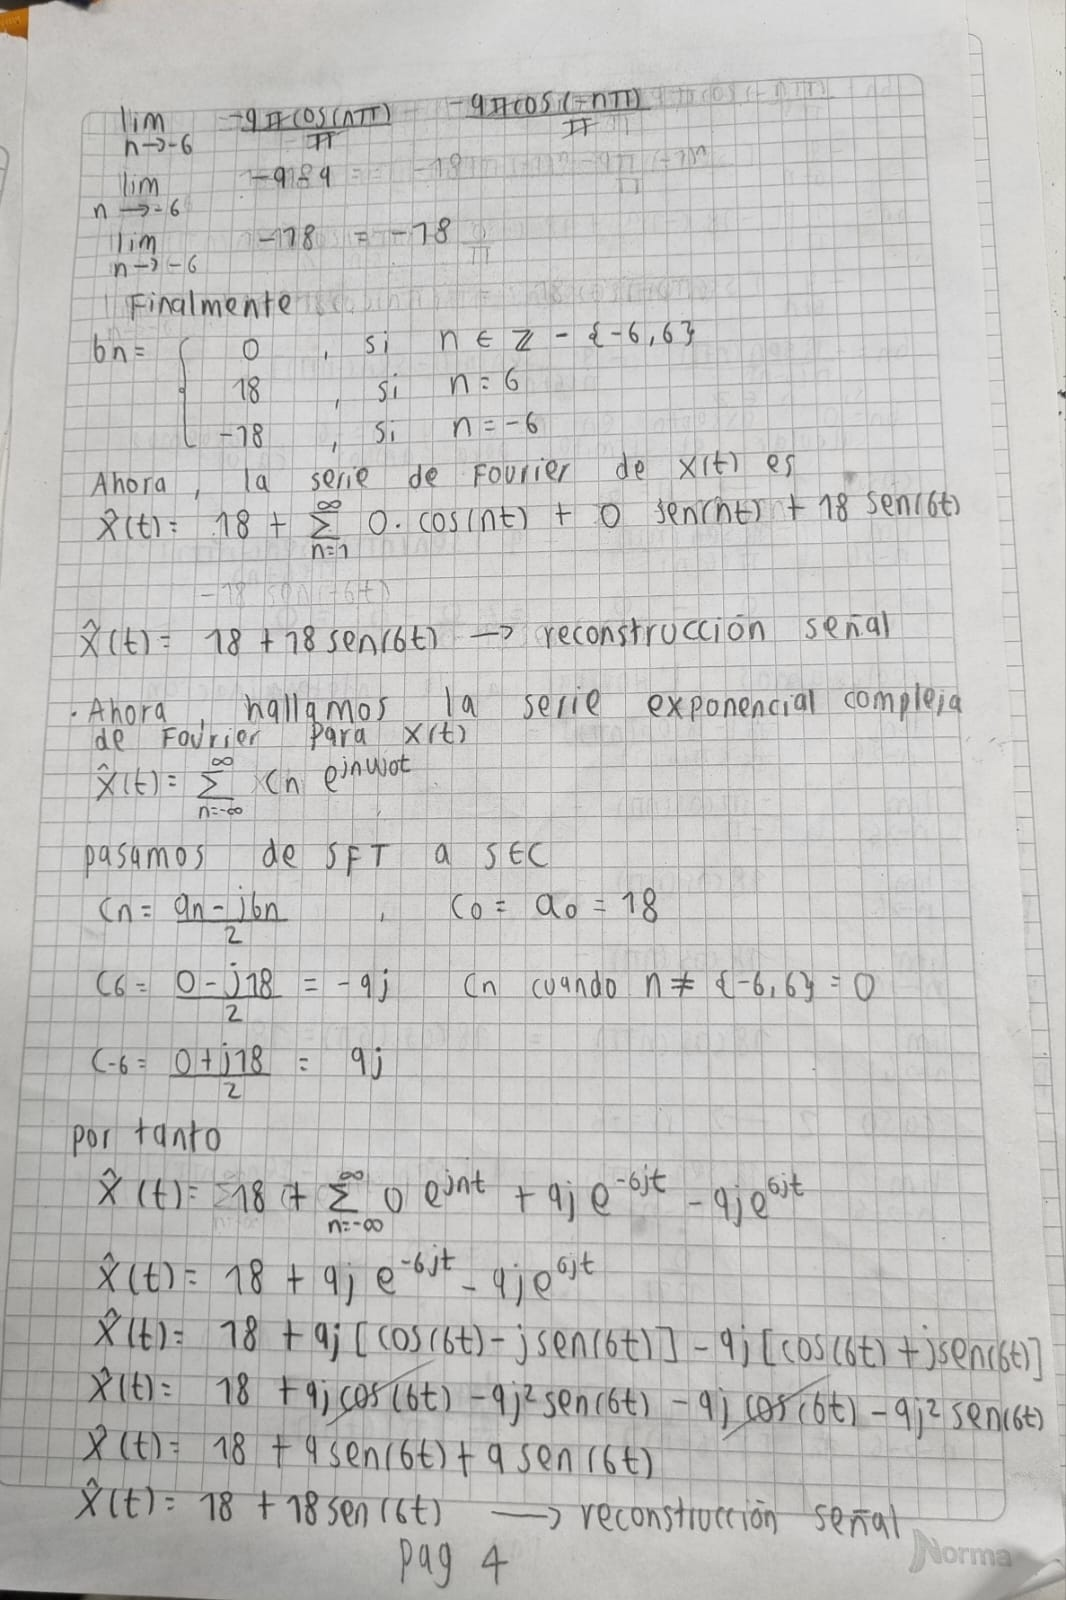

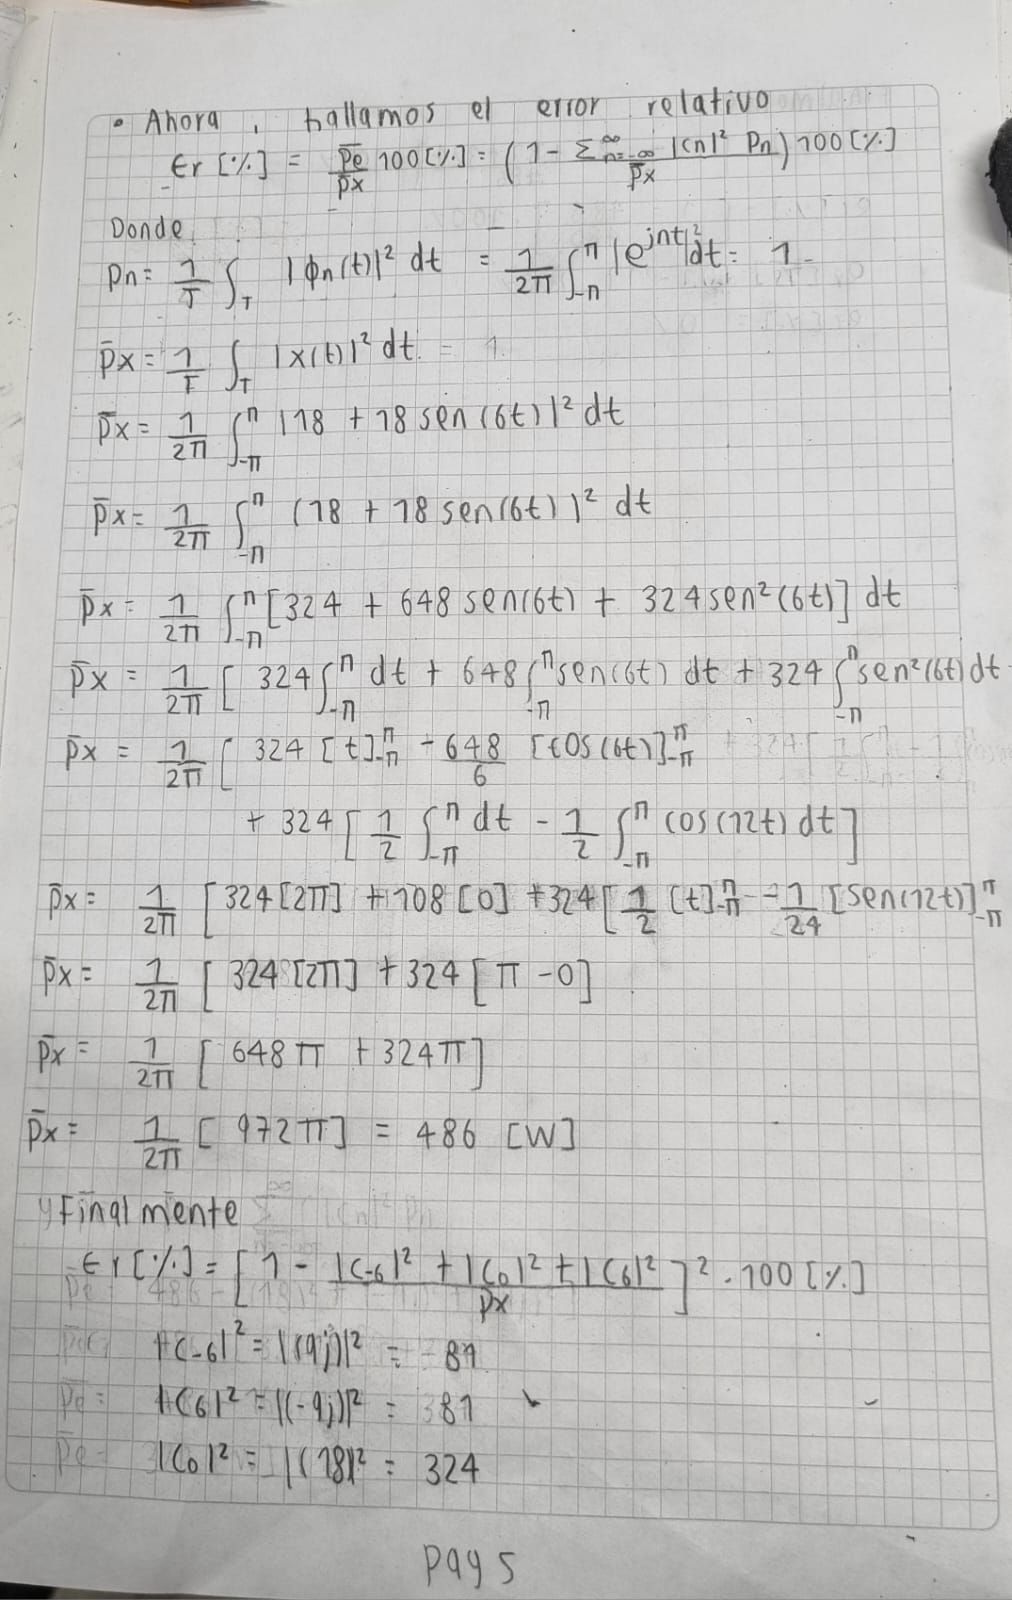

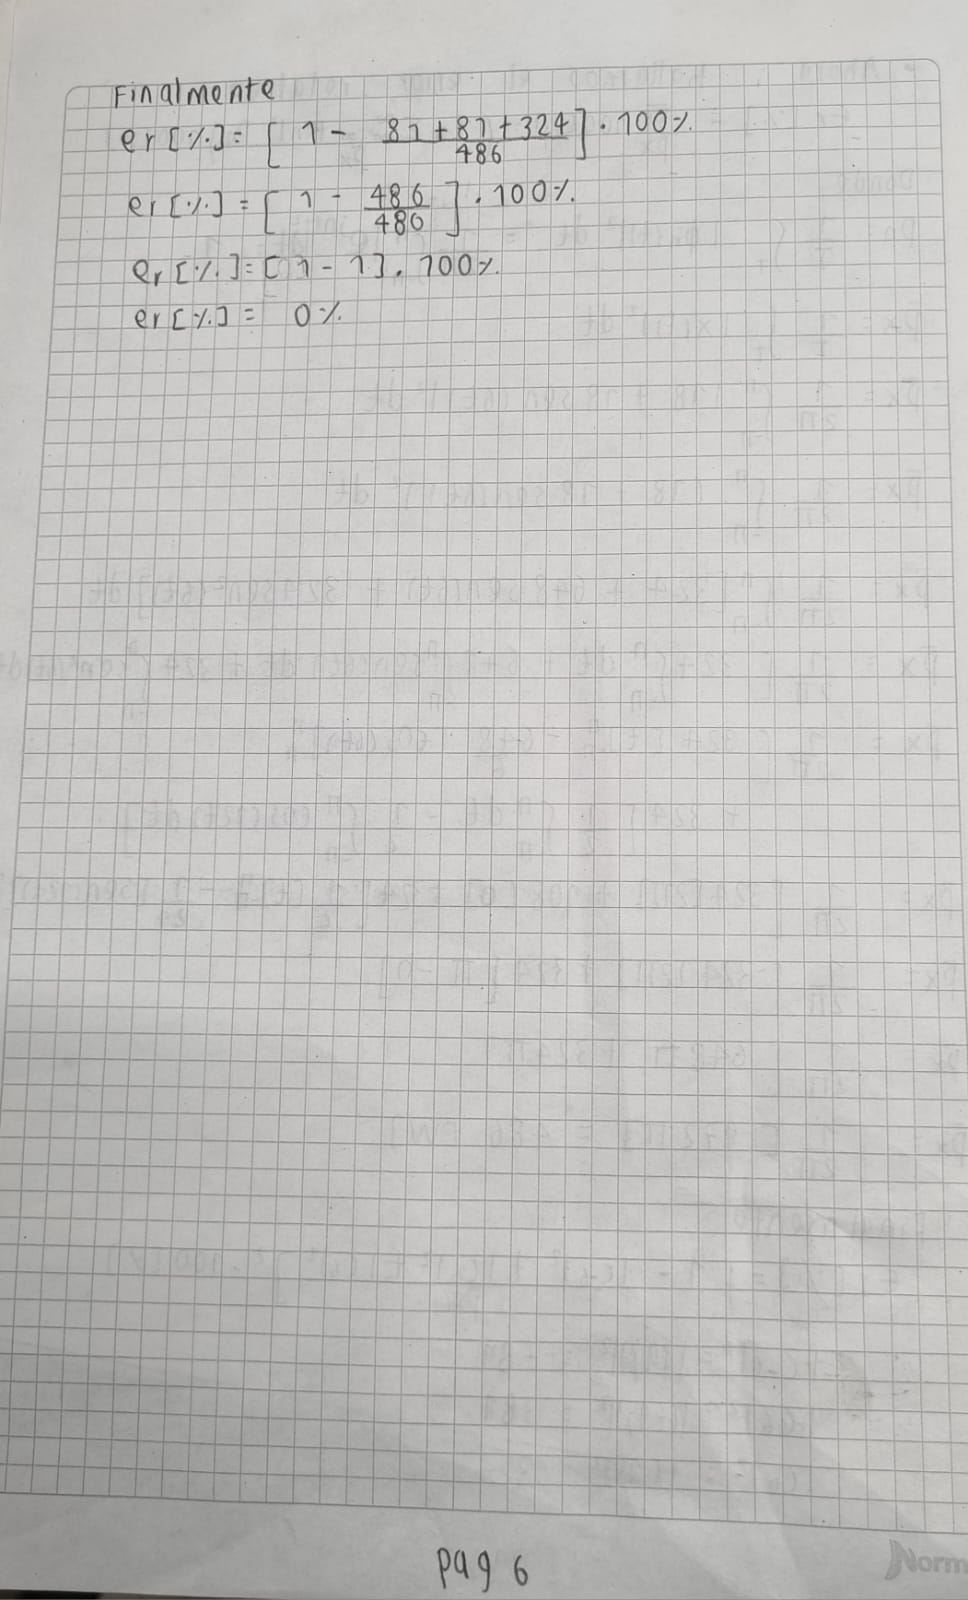

#**Simulaciones**

#**1. Señal**

wo= 1.0
Fo= 1.5707963267948966


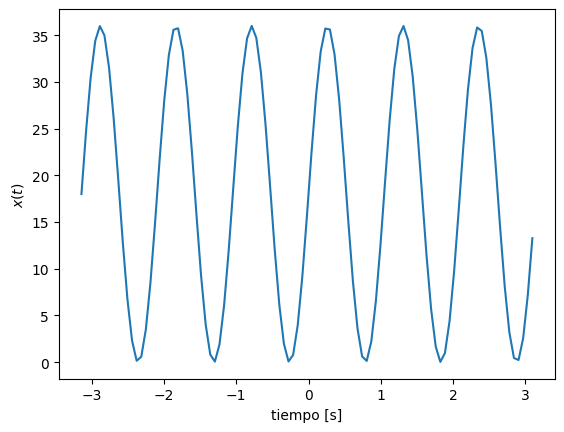

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ti = -np.pi #tiempo inicial
tf = np.pi #tiempo final
wo = 2*np.pi/(tf-ti) #frecuencia angular
Fo = wo/2*np.pi #frecuencia fundamental
print('wo=',wo)
print('Fo=',Fo)
Fs = 10*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
tv = np.arange(ti,tf,1/Fs) #vector de tiempo
Nm = len(tv) # Numero de muestras requeridas

x = abs(6*np.sin((3*tv)+(np.pi/4)))**2 #señal de entrada
plt.plot(tv,x) #gráfica de la señal
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')
plt.show()

#**2. Bases**

In [ ]:
#se crean las bases de la serie exponencial compleja de Fourier
T = tf - ti #intervalo de interés
N = 20 #número armonicos a simular
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((len(tv),2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

In [ ]:
phin.shape #tamaño matriz phin

(99, 41)

In [ ]:
# graficar bases
from ipywidgets import interact,IntSlider

def pltbase(n=1):
    plt.plot(tv,np.real(phin[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("$\phi_n$(t)",fontsize = 14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

interactive(children=(IntSlider(value=1, description='n', max=20, min=-20), Output()), _dom_classes=('widget-i…

<function __main__.pltbase(n=1)>

#**3. Espectro**

In [ ]:
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector armónicos
cn[N] = 18 # nivel dc C_0
cn[N-6] = 9*1j #armónico -6
cn[N+6] = -9*1j #armónico +6

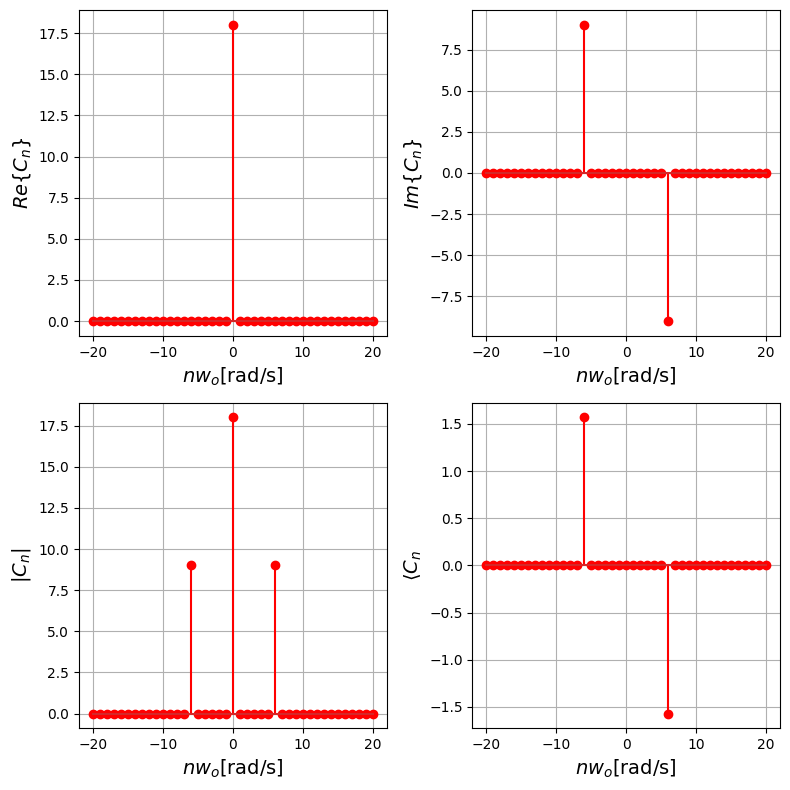

In [ ]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

#**4. Reconstrucción**

In [ ]:
#graficar reconstrucción

Px = 486 # potencia señal x(t)
def pltest(Na=1):
    ind = range(N-Na,N+Na+1)
    er = 1- np.sum(abs(cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='$x(t)$') #señal original
    plt.title('E_r=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return

interact(pltest,Na=(0,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=20), Output()), _dom_classes=('widget-interact'…

<function __main__.pltest(Na=1)>

## Pregunta 2.2 :

Sea la señal portadora $c(t) = A_c\cos(2\pi F_c t),$ con $A_c,F_c\in\mathbb{R},$ y la señal mensaje $m(t)\in\mathbb{R}$. Encuentre el espectro en frecuencia de la señal modulada en amplitud (AM), $y(t) = \left(1+\frac{m(t)}{A_c}\right)c(t)$. Luego, descargue desde youtube $5$ segundos de su canción favorita (capturando del segundo 20 al 25). Presente una simulación de modulación por amplitud AM (tomando como mensaje el fragmento de la canción escogida y con un índice de modulación de 1). Grafique las señales en tiempo y frecuencia (magnitud) de la señal mensaje, portadora y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y señal modulada. Nota: se sugiere utilizar un canal de señal de audio para el desarrollo del ejercicio.

#**Solución teórica**

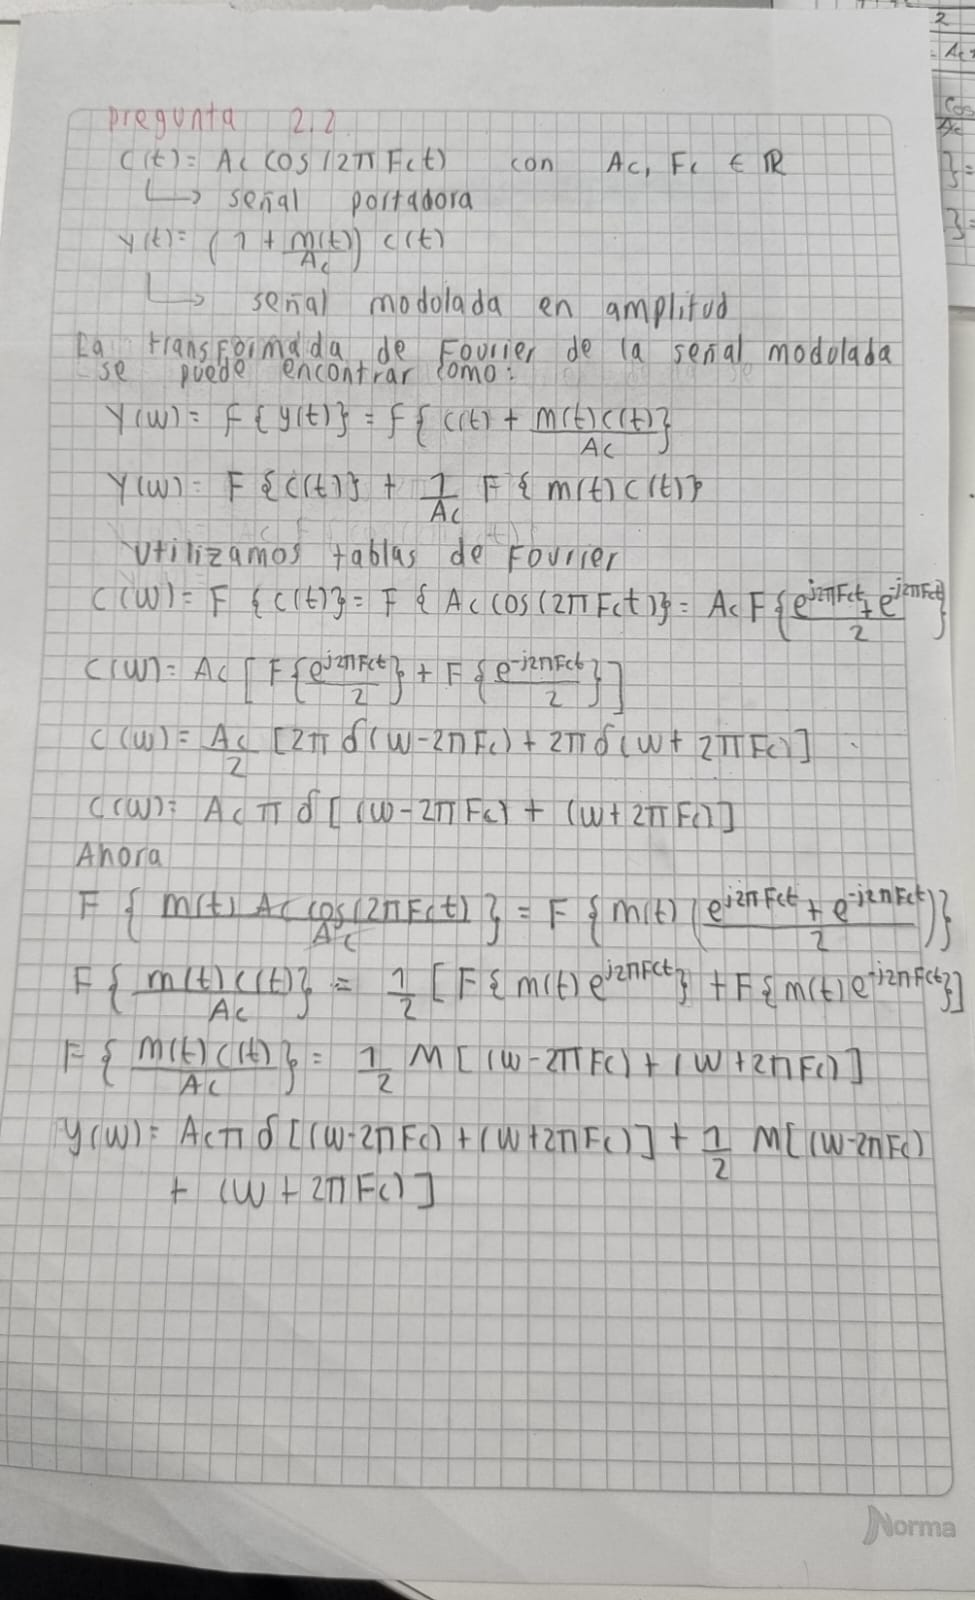

#**Simulaciones**

# Descargar mp3 videos youtube

---

In [ ]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

     - 2.5 MB 7.2 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 7.5 MB/s eta 0:00:00
  Created wheel for yt-dlp: filename=yt_dlp-2023.10.13-py2.

In [ ]:
import os
import yt_dlp as youtube_dl
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

## **link canción y nombre salida mp3**

In [ ]:
link_= ['https://www.youtube.com/watch?v=O2lC_oBI7DU']
name_ = ['Feid']
for name,link in zip(name_,link_):
    print(name)
    download_ytvid_as_mp3(link,name)

Feid
[youtube] Extracting URL: https://www.youtube.com/watch?v=O2lC_oBI7DU
[youtube] O2lC_oBI7DU: Downloading webpage
[youtube] O2lC_oBI7DU: Downloading ios player API JSON
[youtube] O2lC_oBI7DU: Downloading android player API JSON
[youtube] O2lC_oBI7DU: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=O2lC_oBI7DU
[youtube] O2lC_oBI7DU: Downloading webpage
[youtube] O2lC_oBI7DU: Downloading ios player API JSON
[youtube] O2lC_oBI7DU: Downloading android player API JSON
[youtube] O2lC_oBI7DU: Downloading m3u8 information
[info] O2lC_oBI7DU: Downloading 1 format(s): 251
[download] Feid.mp3 has already been downloaded
[download] 100% of    2.81MiB
Download complete... Feid.mp3


# **Convertir mp3 a wav**

In [ ]:
import subprocess

for name in name_:
    subprocess.call(['ffmpeg','-y', '-i', name+'.mp3',
                   name+'.wav'])

#**Leer wav en numpy**

In [ ]:
!pip install soundfile

In [ ]:
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para reproducir audio
#lee archivos wav
for name in name_:
    nombre_out = "output.wav"
    x, fs = sf.read(name+'.wav')

    print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,name+'.wav'))

Frecuencia de muestreo 48000.00[Hz]
audio Feid.wav


In [ ]:
xpro = x.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

In [ ]:
#reproducir fragmento original #señal mensaje
Audio(m,rate=fs)

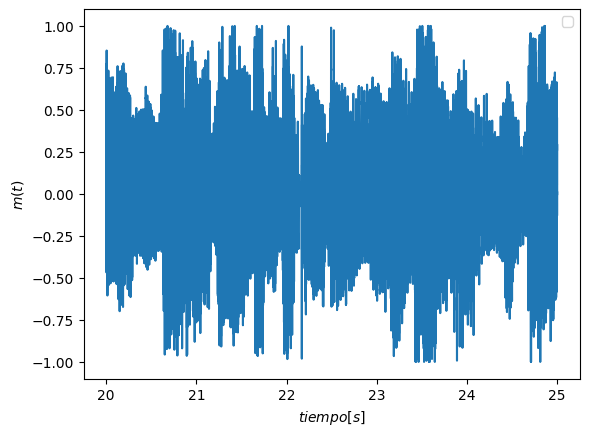

[20.         20.00002083 20.00004167 ... 24.9999375  24.99995833
 24.99997917]
[ 0.55764771 -0.08609009 -0.36462402 ...  0.29360962  0.29589844
  0.26364136]
0.999969482421875


In [ ]:
#Señal mensaje en tiempo y frecuencia
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m(t)$')
plt.legend()
plt.show()
print(tt)
print(m)
max = np.max(m)
print(max)

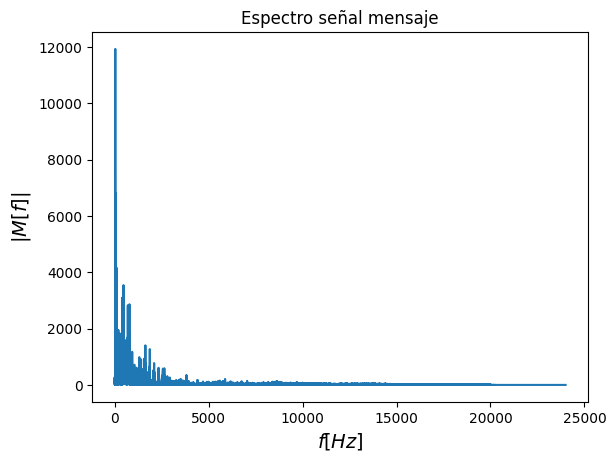

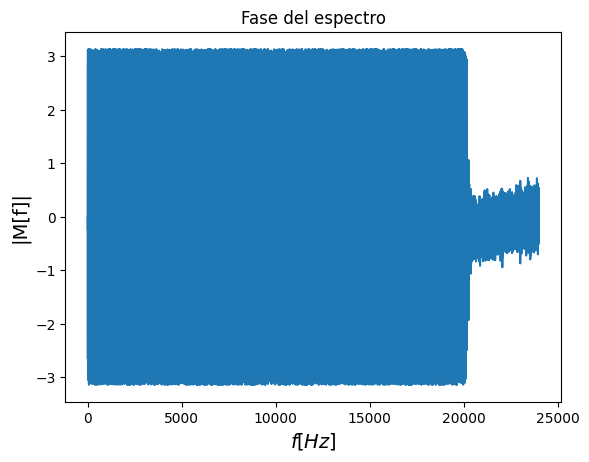

In [ ]:
#Fourier señal mensaje
Mw = np.fft.rfft(m) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(m.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Mw))#fase del espectro
plt.title(r'Fase del espectro')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'|M[f]|',fontsize = 14)
plt.show()

Se fija una $F_c >> F_{max},$ para nuestro caso:

$$\boxed{F_c = 15000 [Hz]}$$

Además, teniendo en cuenta que el índice de modulación se define como:

$$ I_m = \frac{\max(|m(t)|)}{A_c}$$

El el índice de modulación "$I_m$" nos lo da el enunciado del ejercicio .

$I_m = 1$

In [ ]:
Fc = 15000 #frecuencia portadora
Im = 1 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
Ac = np.max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*tt) #portadora
print(Ac)

1.0


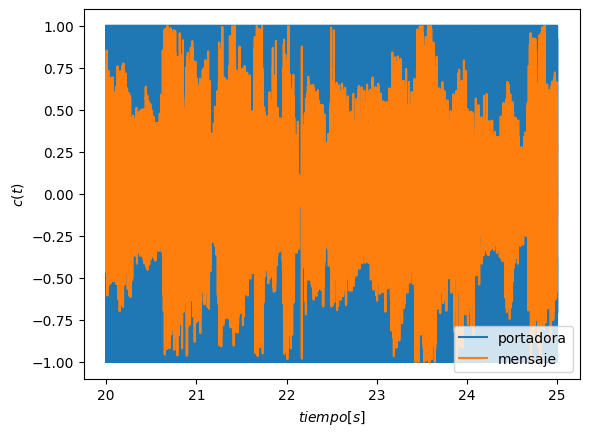

In [ ]:
plt.plot(tt,c,label='portadora')
plt.plot(tt,m,label='mensaje')
plt.xlabel('$tiempo [s]$')
plt.ylabel('$c(t)$')
plt.legend()
plt.show()

In [ ]:
#repoducir portadora
Audio(c,rate=fs)

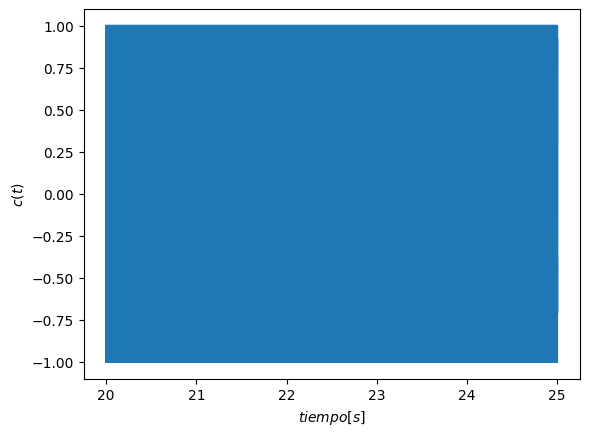

In [ ]:
#Señal portadora en tiempo y frecuencia
plt.plot(tt,c) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$c(t)$')
plt.show()

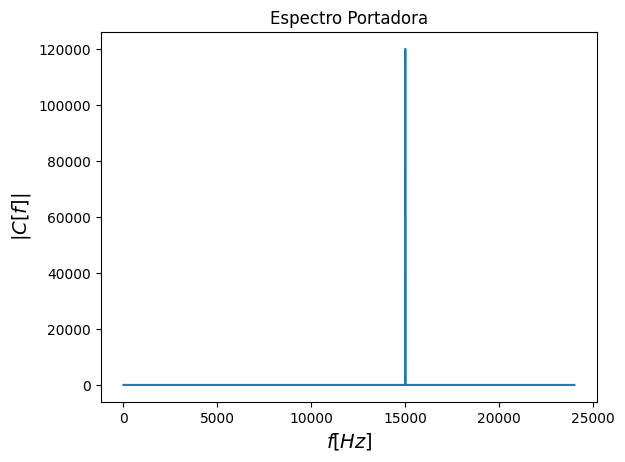

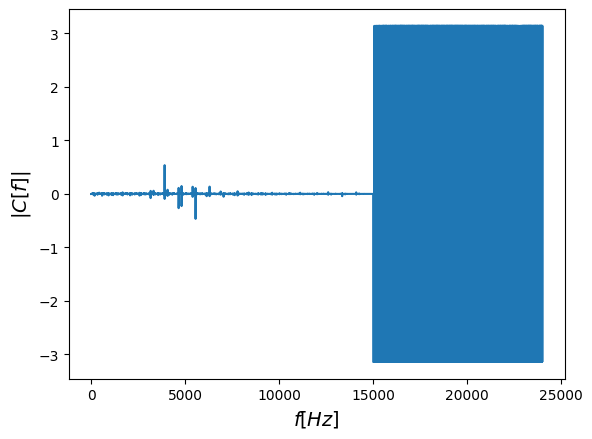

In [ ]:
#Fourier señal portadora
Cw = np.fft.rfft(c) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Cw))#se grafica la magnitud
plt.title(r'Espectro Portadora')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|C[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Cw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|C[f]|$',fontsize = 14)
plt.show()

- La señal a transmitir, señal modulada, en AM se cálcula como:

$$y(t)= \left(1+\frac{m(t)}{A_c}\right)c(t)$$

In [ ]:
#señal modulada
y = (1+m/Ac)*c #señal modulada en AM

In [ ]:
#reproducir modulada
Audio(y,rate=fs)

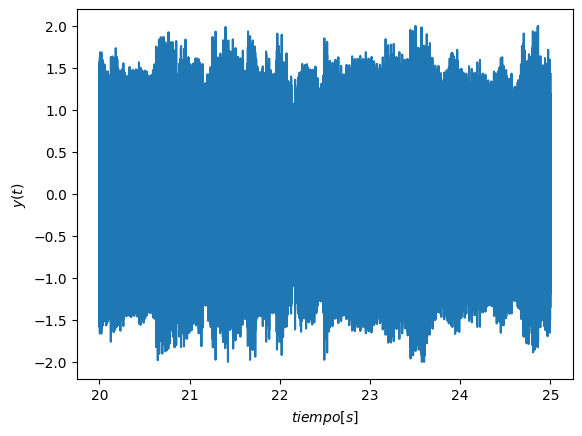

In [ ]:
plt.plot(tt,y) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

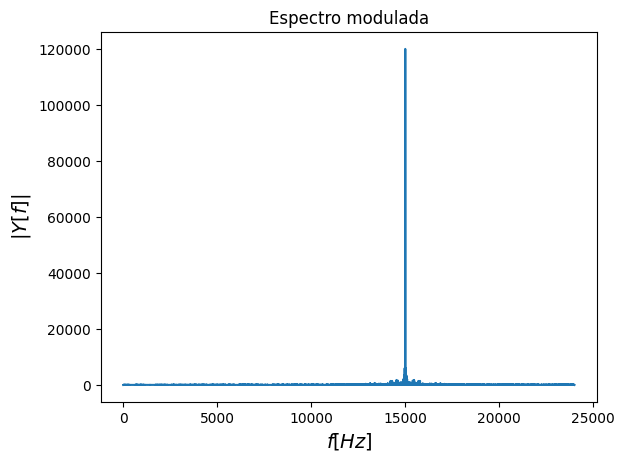

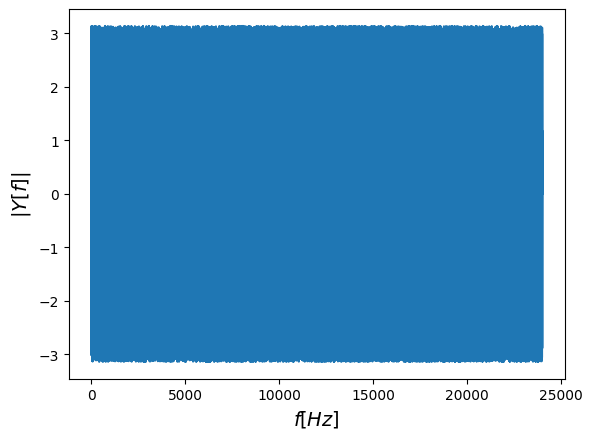

In [ ]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Yw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Yw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()

- Finalmente, se presenta el espectro de la señal mensaje, portadora y modulada.

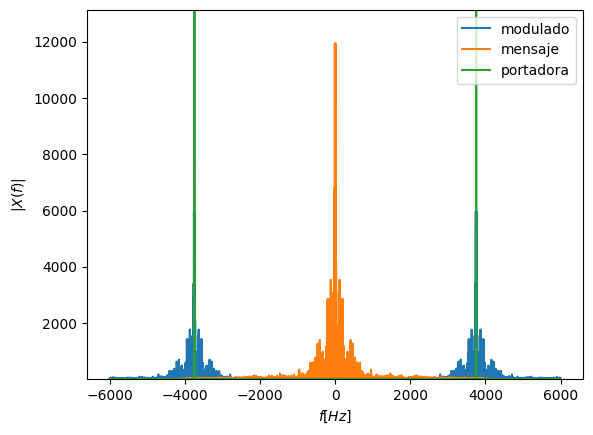

In [ ]:
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(m)
Xfy = np.fft.fft(y)

vfre = np.fft.fftfreq(len(c),1/Fs)

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([np.min(abs(Xfm)), 1.1*np.max(abs(Xfm))])
plt.show()

## **Pregunta 2.3 :**

# Case Western Reserve Experiments


Sea la base de datos para el monitoreo de condición (fallos) en rodamientos a partir del análisis de vibraciones descrita en [Case Western Reserve Experiments](https://engineering.case.edu/bearingdatacenter). Las señales fueron adquiridas para las siguientes condiciones (clases): i) Normal bearing (Nor), fault in the internal train (IR1), fault in the external train (IR2), and fault in the rolling element-ball (BE). Además, los fallos se generaron para tres niveles de severidad (profundidad): 0.007′′, 0.014′′, and 0.021′′ y tres velocidades de operación (1730, 1750, 1772, and 1797 [rpm]). Los datos fueron adquiridos a 12 kHz. Por consiguiente, se tienen los siguientes parámetros de estudio: $F_s=12k$ [Hz] cantidad de puntos en el tiempo $4096$ y cantidad de clases $C = 10$.

Grafique la señal promedio de cada fallo en el tiempo y en la frecuencia.

Utilizando la transformada rápida de Fourier diseñe y construya un detector fallos en rodamientos a partir de señales de vibración y sus etiquetas en los arreglos Xtrain y Ytrain (ver cuaderno de apoyo). Determine las predicciones de fallos para el arreglo Xtest.

In [ ]:
#data downloaded for google drive
FILEID = "1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O datos.zip && rm -rf /tmp/cookies.txt
!unzip -o datos.zip
!dir

--2023-10-28 00:05:34--  https://docs.google.com/uc?export=download&confirm=t&id=1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn
Resolving docs.google.com (docs.google.com)... 172.253.115.100, 172.253.115.113, 172.253.115.138, ...
Connecting to docs.google.com (docs.google.com)|172.253.115.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ktb04l87vqv8ob6nvoqit756tgbv8qbn/1698451500000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=26f5010f-9875-4071-bb2c-b6a87d23cba1 [following]
--2023-10-28 00:05:34--  https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ktb04l87vqv8ob6nvoqit756tgbv8qbn/1698451500000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=26f5010f-9875-4071-bb2c-b6a87d23cba1
Resolving doc-10-0s-docs.googleusercontent.com (doc-10-0s-docs.googleusercontent.com)... 172.253.63.1

In [ ]:
#librerias
import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
from sklearn.metrics import pairwise_distances
import matplotlib
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

#cargar datos
path_ = 'CaractCE.mat'#Case Western Database
dicX = sio.loadmat(path_)

In [104]:
Xt = dicX['F'] #datos en el tiempo
Fs = 12000 #frecuencia de muestreo
Tl = Xt.shape[1]/Fs #tamaño del segmento
print('Xt shape:',Xt.shape)
print('tiempo [s]:', Tl)

Y = dicX['E']
Ytrue = Y[:,2] #clases fallos en los rodamientos
name_c=[]
labels_ = ['NOR','IR1_0.007´´','IR1_0.014´´','IR1_0.021´´',
           'IR2_0.007´´','IR2_0.014´´','IR2_0.021´´',
           'BE_0.007´´','BE_0.014´´','BE_0.021´´'
           ] #nombres de las clases
print("Clases: ",labels_)

Xt:  [[ 0.01460308  0.05444862  0.10764554 ... -0.04547815  0.03108369
   0.09095631]
 [ 0.084072    0.04234892 -0.00208615 ...  0.08031692  0.04068
   0.02795446]
 [ 0.04360062  0.070512    0.08490646 ...  0.05653477  0.10180431
   0.09638031]
 ...
 [-0.02314701 -0.01299481  0.01949222 ...  0.07796886 -0.11289242
   0.01258872]
 [ 0.20141956 -0.01705569 -0.13522725 ... -0.1266994  -0.02233483
   0.12304461]
 [ 0.04426357 -0.02923832  0.0166496  ... -0.33258593  0.25786577
   0.21400828]]
Xt shape: (1200, 4000)
tiempo [s]: 0.3333333333333333
Clases:  ['NOR', 'IR1_0.007´´', 'IR1_0.014´´', 'IR1_0.021´´', 'IR2_0.007´´', 'IR2_0.014´´', 'IR2_0.021´´', 'BE_0.007´´', 'BE_0.014´´', 'BE_0.021´´']


In [ ]:
print(Ytrue.shape) #etique membresia de los datos 10 posibles valores
print(np.unique(Ytrue))

(1200,)
[ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
#partir datos para train y test
Xtrain, Xtest, Ytrain, _ = train_test_split(Xt, Ytrue, test_size=0.3)

print(f"Xtrain shape {Xtrain.shape}, Ytrain shape {Ytrain.shape }Xtest shape {Xtest.shape} ")

Xtrain shape (840, 4000), Ytrain shape (840,)Xtest shape (360, 4000) 


In [85]:
#calcular espectro de Fourier Xtrain
vf = np.fft.rfftfreq(Xtrain.shape[1],1/Fs) #freq vector
Xw = (abs(np.fft.rfft(Xtrain))) # FFT
Xw.shape


(840, 2001)

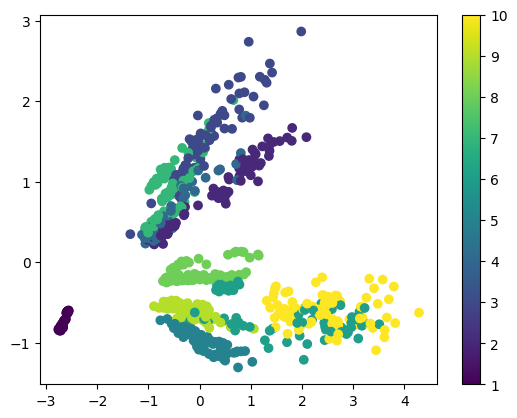

In [106]:
#graficar espectro para clases representativas
sca_ = MinMaxScaler()
Xw_ = sca_.fit_transform(Xw.T).T
#red = TSNE(perplexity = 15,n_components=2,random_state=123,learning_rate='auto',init='pca')
red = PCA(n_components=2)
Z = red.fit_transform(Xw_)

plt.scatter(Z[:,0],Z[:,1],c=Ytrain, label='Xtrain')
plt.colorbar()
plt.show()


In [107]:
print(Xw_)

[[1.23769934e-01 4.64795494e-03 4.42856476e-03 ... 1.62377213e-03
  1.60180267e-03 1.61344430e-03]
 [2.00245993e-01 4.45595067e-03 3.41918766e-03 ... 6.40465554e-04
  6.45074811e-04 6.58272978e-04]
 [1.24167212e-01 1.24909678e-03 1.03689743e-03 ... 5.06785834e-04
  4.84808683e-04 5.26427640e-04]
 ...
 [2.71261271e-02 4.95219533e-04 5.57297719e-04 ... 8.30952808e-04
  8.68700919e-04 8.66492814e-04]
 [2.79475746e-02 2.12225207e-03 1.58710652e-03 ... 1.02893331e-03
  1.01626472e-03 1.00998345e-03]
 [1.00000000e+00 4.73068230e-03 2.52133507e-03 ... 1.94103099e-04
  1.91813899e-04 1.92417364e-04]]


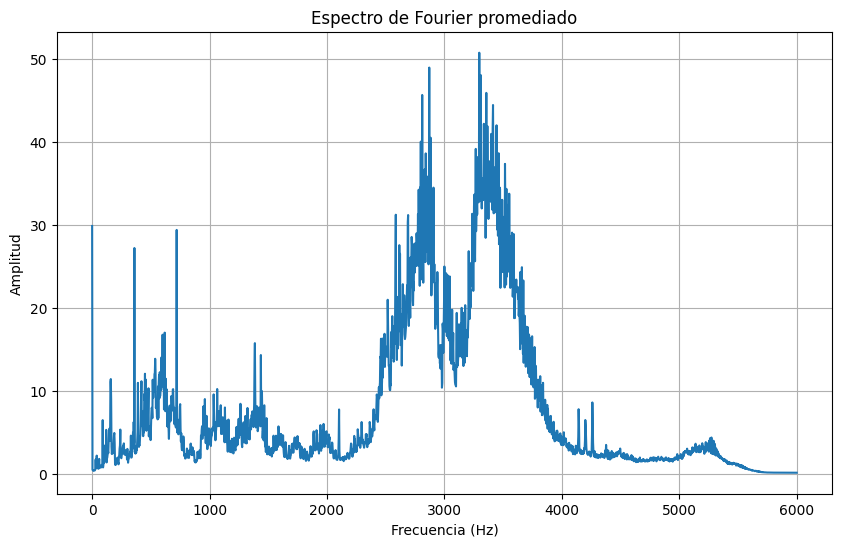

In [108]:
# Supongamos que se quiere promediar las filas de Xw para obtener un espectro promedio
spectrum = np.mean(Xw, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(vf, spectrum)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de Fourier promediado')
plt.grid(True)
plt.show()

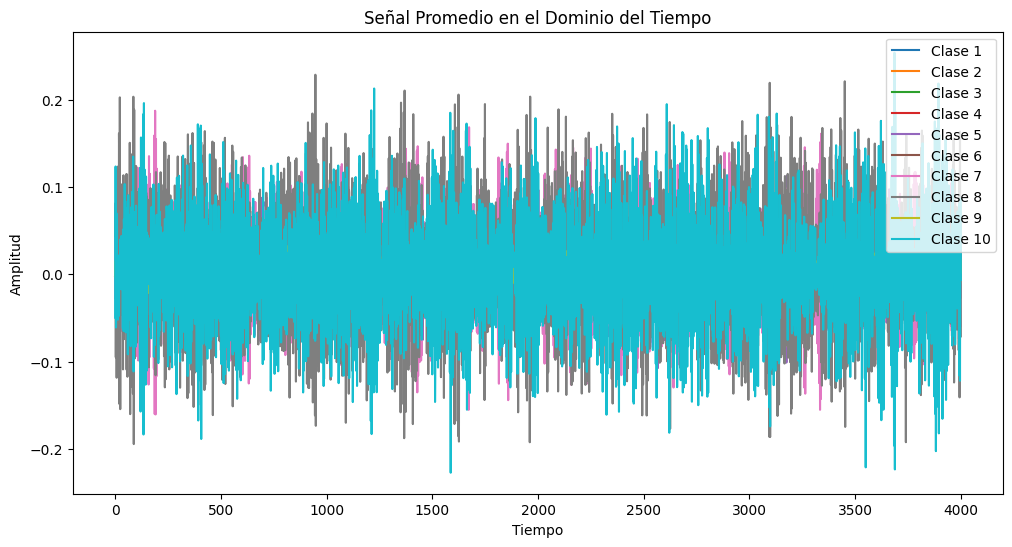

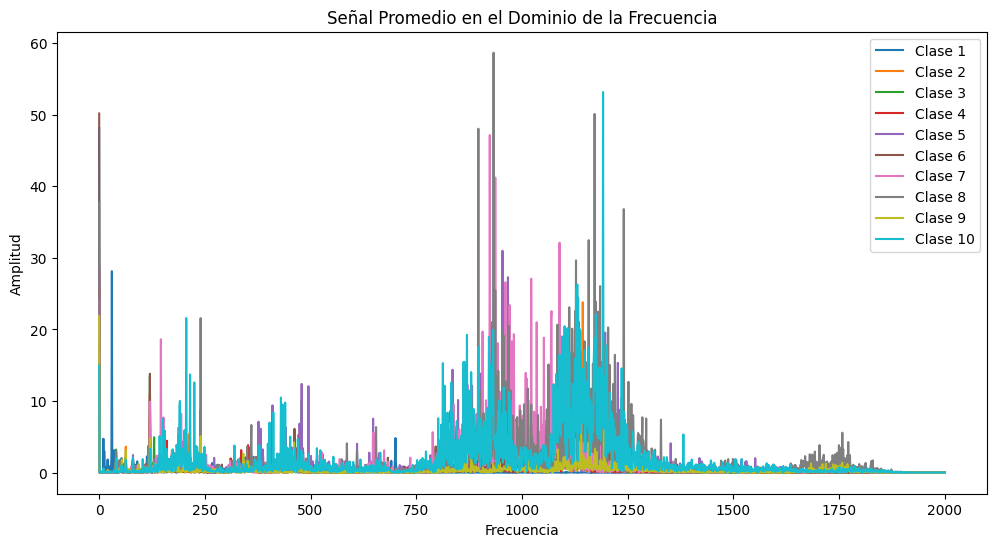

In [109]:
# Función para calcular la señal promedio para cada clase
def calcular_señal_promedio(X, Y):
    clases = np.unique(Y)
    señales_promedio_tiempo = []
    señales_promedio_frecuencia = []

    for clase in clases:
        # Seleccionar las muestras de la clase actual
        muestras_clase = X[Y == clase]
        # Calcular la señal promedio en el dominio del tiempo
        señal_promedio_tiempo = np.mean(muestras_clase, axis=0)
        señales_promedio_tiempo.append(señal_promedio_tiempo)
        # Calcular la FFT de la señal promedio
        señal_promedio_fft = np.abs(np.fft.rfft(señal_promedio_tiempo))
        señales_promedio_frecuencia.append(señal_promedio_fft)

    return clases, señales_promedio_tiempo, señales_promedio_frecuencia

clases, señales_promedio_tiempo, señales_promedio_frecuencia = calcular_señal_promedio(Xtrain, Ytrain)

# Graficar señales promedio en el dominio del tiempo
plt.figure(figsize=(12, 6))
for i, clase in enumerate(clases):
    plt.plot(señales_promedio_tiempo[i], label=f'Clase {clase}')

plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal Promedio en el Dominio del Tiempo')
plt.legend()
plt.show()

# Graficar señales promedio en el dominio de la frecuencia
plt.figure(figsize=(12, 6))
for i, clase in enumerate(clases):
    plt.plot(señales_promedio_frecuencia[i], label=f'Clase {clase}')

plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.title('Señal Promedio en el Dominio de la Frecuencia')
plt.legend()
plt.show()

In [110]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Entrenar un clasificador SVM
clf = SVC(kernel='linear')
clf.fit(Xtrain, Ytrain)

# Realizar predicciones en el conjunto de prueba (Xtest)
Ypred = clf.predict(Xtest)

# Calcular la precisión de las predicciones
accuracy = accuracy_score( _ , Ypred)
print(f"Precisión del detector de fallos: {accuracy * 100:.2f}%")

Precisión del detector de fallos: 26.94%


In [111]:
# Realizar predicciones en el conjunto de prueba (Xtest)
Ypred = clf.predict(Xtest)

# Mostrar los tipos de fallos detectados en Xtest
print("Tipos de fallos detectados en Xtest:")
for i in range(len(Ypred)):
    if Ypred[i] >= 0 and Ypred[i] < len(labels_):
        clase_predicha = labels_[Ypred[i]]
        print(f"Muestra {i + 1}: {clase_predicha}")
    else:
        print(f"Muestra {i + 1}: Clase fuera de rango")

Tipos de fallos detectados en Xtest:
Muestra 1: IR1_0.007´´
Muestra 2: BE_0.021´´
Muestra 3: IR2_0.007´´
Muestra 4: IR1_0.007´´
Muestra 5: IR1_0.014´´
Muestra 6: IR2_0.007´´
Muestra 7: BE_0.021´´
Muestra 8: BE_0.021´´
Muestra 9: IR1_0.021´´
Muestra 10: BE_0.021´´
Muestra 11: IR1_0.007´´
Muestra 12: BE_0.021´´
Muestra 13: IR2_0.014´´
Muestra 14: IR2_0.007´´
Muestra 15: IR2_0.007´´
Muestra 16: IR1_0.007´´
Muestra 17: IR1_0.007´´
Muestra 18: IR1_0.007´´
Muestra 19: BE_0.021´´
Muestra 20: IR1_0.007´´
Muestra 21: IR2_0.007´´
Muestra 22: BE_0.007´´
Muestra 23: BE_0.007´´
Muestra 24: IR1_0.007´´
Muestra 25: IR2_0.014´´
Muestra 26: BE_0.021´´
Muestra 27: IR2_0.007´´
Muestra 28: IR1_0.007´´
Muestra 29: IR1_0.007´´
Muestra 30: BE_0.021´´
Muestra 31: IR1_0.014´´
Muestra 32: IR1_0.007´´
Muestra 33: IR2_0.007´´
Muestra 34: IR1_0.007´´
Muestra 35: IR1_0.014´´
Muestra 36: BE_0.021´´
Muestra 37: BE_0.021´´
Muestra 38: IR1_0.014´´
Muestra 39: IR1_0.014´´
Muestra 40: IR1_0.007´´
Muestra 41: IR1_0.014´´
